In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import ipywidgets as widg
% matplotlib inline

In [4]:
dataPathExt = '/Users/olivergadsby/Desktop/ENPH 459/Results'

# specify data set to analyze (use pandas to give options, similar to watch.py program)

# get data path for this set

# load simulated torque profile
# load actual torque profile

In [5]:
# SIMULATED TORQUE PROFILE
X1 = np.linspace(0,10,200)
Y1 = np.sin(X1)

# ACTUAL TORQUE PROFILE
noise = np.random.normal( scale=0.1, size=(len(Y1)) )
X2 = X1
Y2 = Y1 + noise

# plot overlaid torque profiles

In [6]:
# PLOTTING FUNCTION
def plotData(vertBar, res):
    plt.plot(X1,Y1)
    plt.plot(X2,Y2)
    if res:
        plt.plot(X1,Y1-Y2) # might need to interpolate if X1, X2 not same length
    plt.axvline(x=vertBar)
    plt.show()
    
    return

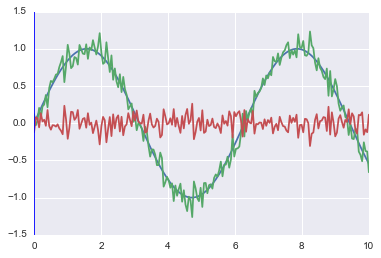

<function __main__.plotData>

In [7]:
# SHOW TORQUE PROFILE WITH TIME EVOLUTION
timeSlider = widg.FloatSlider(description='Time', min=min(X1), max=max(X1), step=5*(max(X1)-min(X1))/len(X1))
showResiduals = widg.Checkbox(description='Show Residuals?',value=True)
widg.interact(plotData,
            vertBar=timeSlider,
            res=showResiduals)

# load simulated position data
# load actual calibrated position data

In [8]:
# TIME AND ANGLE CONSTANTS
dt = 0.01
fallTime = 10
numSteps = int(fallTime/dt)
angleInit = np.array([np.pi/2]*numSteps)
angleUpdate = np.array(list(range(numSteps)))

# LENGTH CONSTANTS
lenShin = 1.5
lenThigh = 1.4
lenTorso = 3
totalLength = lenShin + lenThigh + lenTorso


# SIMULATION DATA SET
headAngVelSim = 0.6*dt
hipAngVelSim = 0.3*dt
kneeAngVelSim = 0.4*dt
headAngleSim = angleInit + headAngVelSim*angleUpdate
hipAngleSim = angleInit + hipAngVelSim*angleUpdate
kneeAngleSim = angleInit + kneeAngVelSim*angleUpdate

# ACTUAL DATA SET
headAngVelActual = 0.55*dt
hipAngVelActual = 0.35*dt
kneeAngVelActual = 0.45*dt
headAngleActual = angleInit + headAngVelActual*angleUpdate
hipAngleActual = angleInit + hipAngVelActual*angleUpdate
kneeAngleActual = angleInit + kneeAngVelActual*angleUpdate


# ANGLE TO POSITION MAPPING FUNCTION
def positions (kneeAngle, hipAngle, headAngle, lenShin=lenShin, lenThigh=lenThigh, lenTorso=lenTorso):

    footPos_X = 0*kneeAngle
    kneePos_X = footPos_X + lenShin*np.cos(kneeAngle)
    hipPos_X = kneePos_X + lenThigh*np.cos(hipAngle)
    headPos_X = hipPos_X + lenTorso*np.cos(headAngle)
    xPos = np.array([footPos_X, kneePos_X, hipPos_X, headPos_X]).transpose()

    footPos_Y = 0*kneeAngle
    kneePos_Y = footPos_Y + lenShin*np.sin(kneeAngle)
    hipPos_Y = kneePos_Y + lenThigh*np.sin(hipAngle)
    headPos_Y = hipPos_Y + lenTorso*np.sin(headAngle)
    yPos = np.array([footPos_Y, kneePos_Y, hipPos_Y, headPos_Y]).transpose()
    
    return np.array([xPos, yPos])

simPositions = positions(kneeAngleSim, hipAngleSim, headAngleSim)
actualPositions = positions(kneeAngleActual, hipAngleActual, headAngleActual)

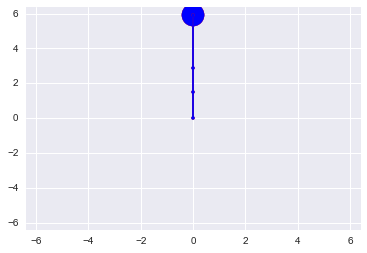

In [9]:
def plotPlot(i):
    i = int(i*numSteps/fallTime)
    
    # JOINTS
    plt.plot(simPositions[0][i], simPositions[1][i], '.-', color='red')
    plt.plot(actualPositions[0][i], actualPositions[1][i], '.-', color='blue')
    
    # HEADS
    plt.scatter(simPositions[0][i][-1], simPositions[1][i][-1], s=[500], color='red')
    plt.scatter(actualPositions[0][i][-1], actualPositions[1][i][-1], s=[500], color='blue')
    
    # LIMITS
    plt.xlim([-(totalLength+0.5), totalLength+0.5])
    plt.ylim([-(totalLength+0.5), totalLength+0.5])
    plt.show()
    
    return
    
timeSlider = widg.FloatSlider(description='Time', min=0, max=fallTime*(1-1/numSteps), step=2*fallTime*dt)
widg.interact(plotPlot,i=timeSlider)


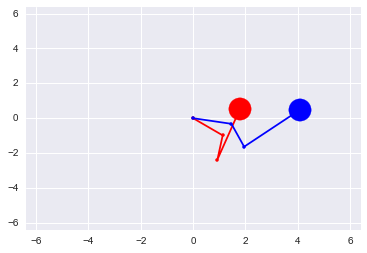

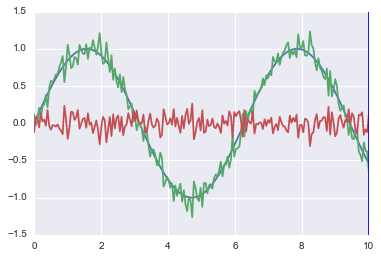

In [13]:
def doublePlot(time, res):
    plotPlot(time)
    plotData(time, res)

    
timeSlider = widg.FloatSlider(description='Time', min=0, max=fallTime*(1-1/numSteps), step=5*fallTime*dt)
showResiduals = widg.Checkbox(description='Show Residuals?',value=True)

widg.interact(doublePlot,
            time=timeSlider,
            res=showResiduals)

# make plots side by side
# fix flickering

In [11]:
# what else?
# plot distance between joints in sim and actual as functions of time
# 4 plot: positions as function of time, distances between each of 3 joints (with line)

# generate animations and show in line

# give option to pass data to update neural network and plot

Information for each fall:
Lengths
Mass distributions
Calibrated positions
Which sim data to use as reference
    figure out recommender to make best match given our available data sets?
    give score of applicability to our initial conditions
    recommend a data set for Mahsa to run if applicability is too low
    give conditions that would be most likely to improve applicability
    option to try regression model